In [33]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import cv2

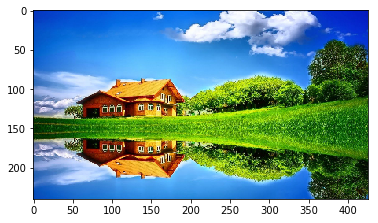

In [34]:
im=cv2.imread('./image.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# To reshape
r,c=im.shape[:2]
orr=240
oc=int(orr*float(c)/r)
im=cv2.resize(im,(oc,orr))
pixels = im.reshape((-1, 3))
plt.imshow(im)

In [35]:
# Applying KMeans from scikit learn
km = KMeans(n_clusters=8)
km.fit(pixels)
km.cluster_centers_

array([[  88.60334079,  164.656308  ,  235.69956693],
       [ 117.67665337,  179.58937019,   27.49067804],
       [ 195.93173398,  216.61263431,  239.90959615],
       [  57.78674115,  116.72036474,   21.20101865],
       [ 209.3283914 ,  197.67546331,   57.01630838],
       [  19.94238112,   44.9750781 ,    8.72016661],
       [ 139.22108757,   48.34337503,   11.63747766],
       [  24.25015618,  102.83261937,  211.81106649]])

In [36]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
colors

array([[ 88, 164, 235],
       [117, 179,  27],
       [195, 216, 239],
       [ 57, 116,  21],
       [209, 197,  57],
       [ 19,  44,   8],
       [139,  48,  11],
       [ 24, 102, 211]], dtype=uint8)

In [37]:
# To calculate % of each dominant color
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per

array([ 0.20552621,  0.10526213,  0.1055849 ,  0.11919014,  0.06585485,
        0.14107981,  0.03831182,  0.21919014])

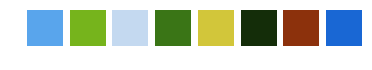

In [38]:
# To visualize dominant colors
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [39]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)

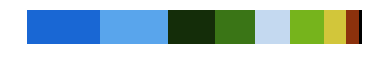

In [40]:
# To visualize according to their respective %
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end

plt.imshow(patch)
plt.show()

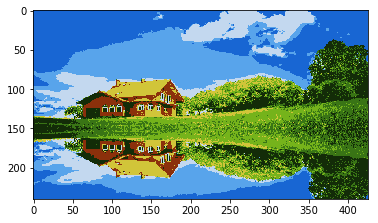

In [41]:
# To reproduce

for ix in range(len(pixels)):
    pixels[ix]=colors[km.labels_[ix]]
xn=pixels.reshape((orr,oc,3)) 
plt.imshow(xn)